Reference: 
https://app.dataquest.io/c/135/m/745/guided-project%3A-credit-card-customer-segmentation/   with solution: https://github.com/dataquestio/solutions/blob/master/Mission745Solutions.ipynb 
*https://nbviewer.org/github/dataquestio/solutions/blob/master/Mission745Solutions.ipynb*
  *https://github.com/dataquestio/solutions*

We’ll play the role of a data scientist working for a credit card company. We’ve been given a dataset containing information about the company’s clients and asked to help segment them into different groups in order to apply different business strategies for each type of customer.

The company expects to receive a group for each client and also an explanation of the characteristics of each group and what are the main points that make them different.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 1 - Data

In [4]:
customers_df = pd.read_csv('customer_segmentation.csv')
customers_df
# Familiarize ourselves with the dataset

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


Annotation on columns in df:
- customer_id, age, gender
- dependent_count: number of dependents of each customer.
- education_level
- marital_status: marital status ("Single", "Married", etc.) tình trạng hôn nhân 
- estimated_income: the estimated income for the customer projected by the data science team.
- months_on_book: time as a customer in months.
- total_relationship_count: number of times the customer contacted the company.
- months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
- credit_limit: customer's credit limit.  : Hạn mức tín dụng
- total_trans_amount: (total amount transitioned) the overall amount of money spent on the card by the customer.
- total_trans_count: (total number of transactions) the overall number of times the customer used the card.
- avg_utilization_ratio: daily average utilization ratio (Tỷ lệ sử dụng trung bình hàng ngày)

## Familiarize ourselves with the dataset

In [5]:
customers_df.info()
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


- 10127 rows and 14 columns including a unique identifier for each client, which is not going to be needed for the segmentation.
- dtypes: float64(2), int64(9), object(3) => have 3 categorical columns to deal with (để xử lý).
- no missing values.

Column: gender
gender
F    5358
M    4769
Name: count, dtype: int64

Column: education_level
education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

Column: marital_status
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64



C:\Users\Administrator\AppData\Local\Temp\ipykernel_7604\3913669992.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customers_df.drop('customer_id', axis=1).hist(ax=ax) #Removing the customer's id before


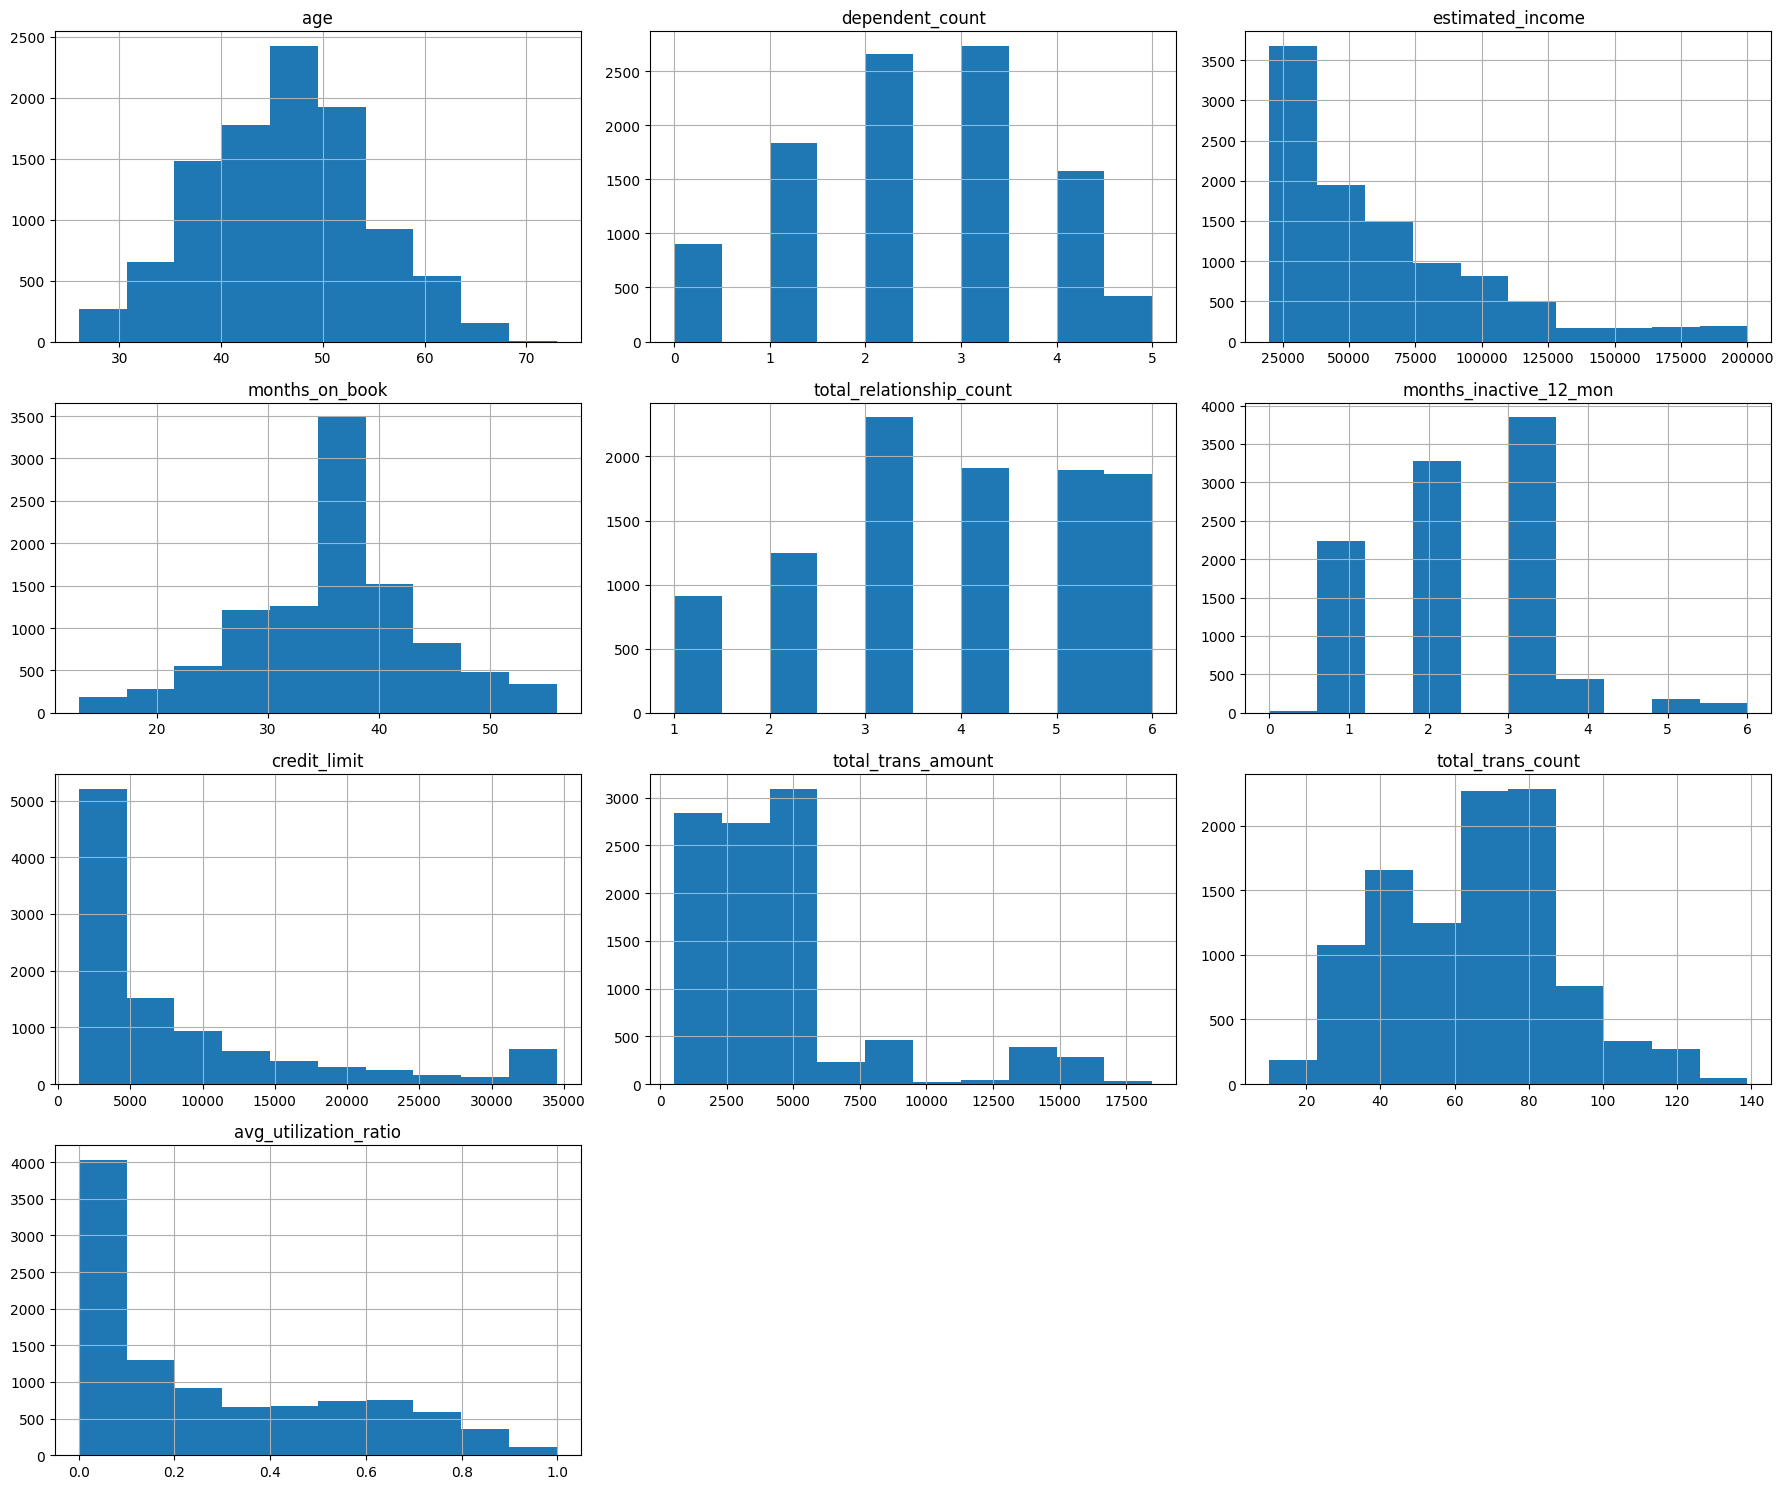

In [6]:
# Distribution: 
for col in ['gender', 'education_level', 'marital_status']:
    print(f"Column: {col}")
    print(customers_df[col].value_counts(), end='\n\n')

#Plot the distribution: customers_df[col].value_counts()
fig, ax = plt.subplots(figsize=(18, 15)) # figure contains all subplots and a list of axes objects for each subplot
customers_df.drop('customer_id', axis=1).hist(ax=ax) #Removing the customer's id before
                                                     # ax của customer_combined_df_plot = ax tạo trước đó
plt.tight_layout()
plt.show()

<Axes: >

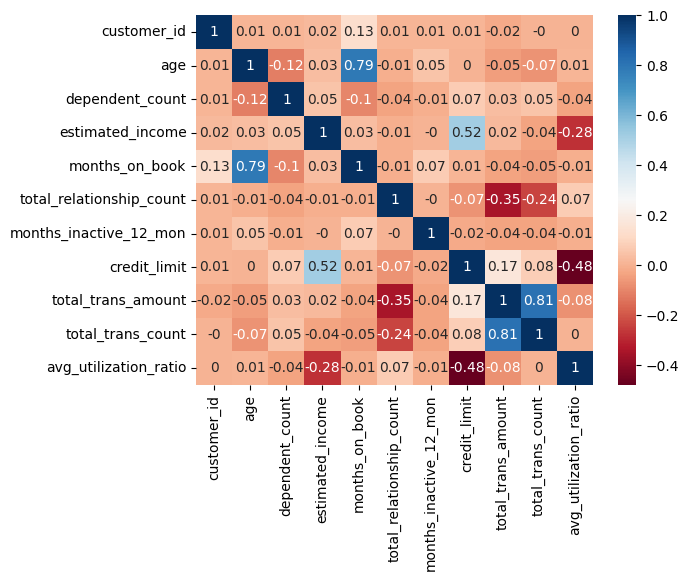

In [7]:
# Before `Data Processing` - Correlation between features:

import seaborn as sns
import pandas as pd

numeric_columns = customers_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr().round(2)

sns.heatmap(correlation_matrix, cmap="RdBu", annot=True)


Heatmap Results: high correlation variable_pairs: age - time as a customer, overall money-overall times, credit_limit-estimated income, credit_limit-daily avg utilization ratio (tỉ lệ/ratio use daily avg)

## Feature Engineering: 

In [8]:
## Feature Engineering: dealing with the 3 categorical variables

### drop `customer_id` col
customers_copy_df = customers_df.copy().drop('customer_id', axis=1)

### transform the `gender`, `education_level`` column to numeric
customers_copy_df['gender'] = customers_copy_df['gender'].replace({'M': 1, 'F': 0})

education_level_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}
customers_copy_df['education_level'] = customers_copy_df['education_level'].map(education_level_mapping)

### no level of magnitude between "Single", "Married" or "Divorced": one-hot-encoding to create dummy variables from `marital_status` column
marital_status_dummies = pd.get_dummies(customers_copy_df['marital_status'])
marital_status_dummies = marital_status_dummies.astype(int)
preprocessed_customers_df = pd.concat([customers_copy_df, marital_status_dummies], axis=1).drop('marital_status', axis=1)
preprocessed_customers_df

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Divorced,Married,Single,Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,0,0,1,0
10123,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,1,0,0,0
10124,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,0,1,0,0
10125,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,0,0,0,1


## Scaling the Data: transform the data so it's all on the same scale

In [9]:
## Scaling the Data: transform the data so it's all on the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(preprocessed_customers_df) # instantiate 1 obj 
scaled_customers_array = scaler.transform(preprocessed_customers_df) #transform method to scale the data, assign to 1 diff variable. 
scaled_customers_df = pd.DataFrame(scaled_customers_array, columns=preprocessed_customers_df.columns)
scaled_customers_df


,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Divorced,Married,Single,Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.662787,-0.281380,0.509840,-0.522785,-0.337598,-0.509330,3.259358,2.221481,0.678714,-0.282405,-0.928214,1.252337,-0.282609
10123,-0.664382,1.059956,-0.266547,0.662787,-0.560775,-1.368442,0.120579,-0.337598,-0.479181,1.283475,0.176440,0.856458,3.541013,-0.928214,-0.798507,-0.282609
10124,-0.290150,-0.943436,-1.036462,-0.752211,-0.738571,0.008965,0.763943,0.651940,-0.354626,1.732994,-0.207005,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
10125,-2.036565,1.059956,-0.266547,0.662787,-0.382978,0.008965,0.120579,0.651940,-0.368710,1.174848,-0.121795,-0.997155,-0.282405,-0.928214,-0.798507,3.538459


<Axes: >

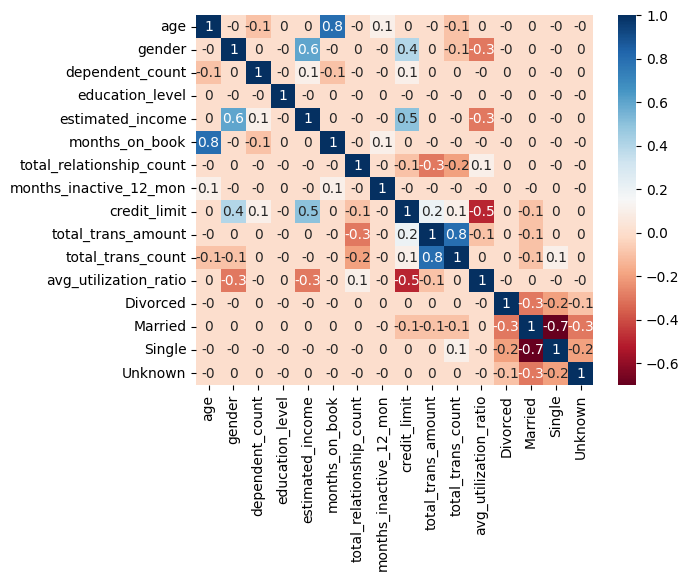

In [10]:
# After `Data Processing` - Correlation between features:
import seaborn as sns
correlation_matrix = scaled_customers_df.corr().round(1) # Create correlation matrix
# print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap="RdBu", annot=True) #cmap; color map


<Axes: >

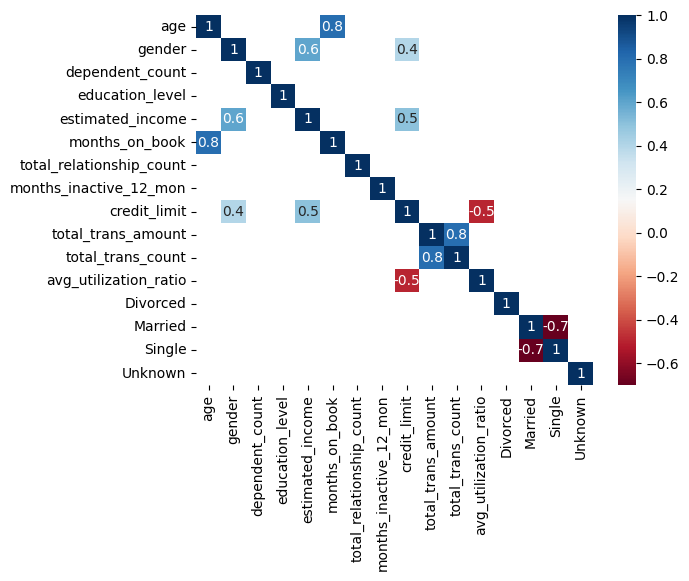

In [11]:
# After `Data Processing` - correlations above or equal to 0.5:
import seaborn as sns
import numpy as np

correlation_matrix = scaled_customers_df.corr().round(1)
mask = np.abs(correlation_matrix) >= 0.4 # corr above or equal to 0.5
filtered_correlation_matrix = correlation_matrix[mask]

sns.heatmap(filtered_correlation_matrix, cmap="RdBu", annot=True)

Results Heatmap high correlation variable_pairs: 
- Before `Data Processing`: age - time as a customer, overall money-overall times, credit_limit-estimated income, credit_limit-daily avg utilization ratio (tỉ lệ/ratio use daily avg):  
- **interesting discovery** After `Data Processing` add high corr pairs: gender-estimated_income, gender-credit_limit. 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7604\2806723862.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  preprocessed_customers_df.hist(ax=axes) # ax của subplot được vẽ trên trục axes của figure được tạo trước đó


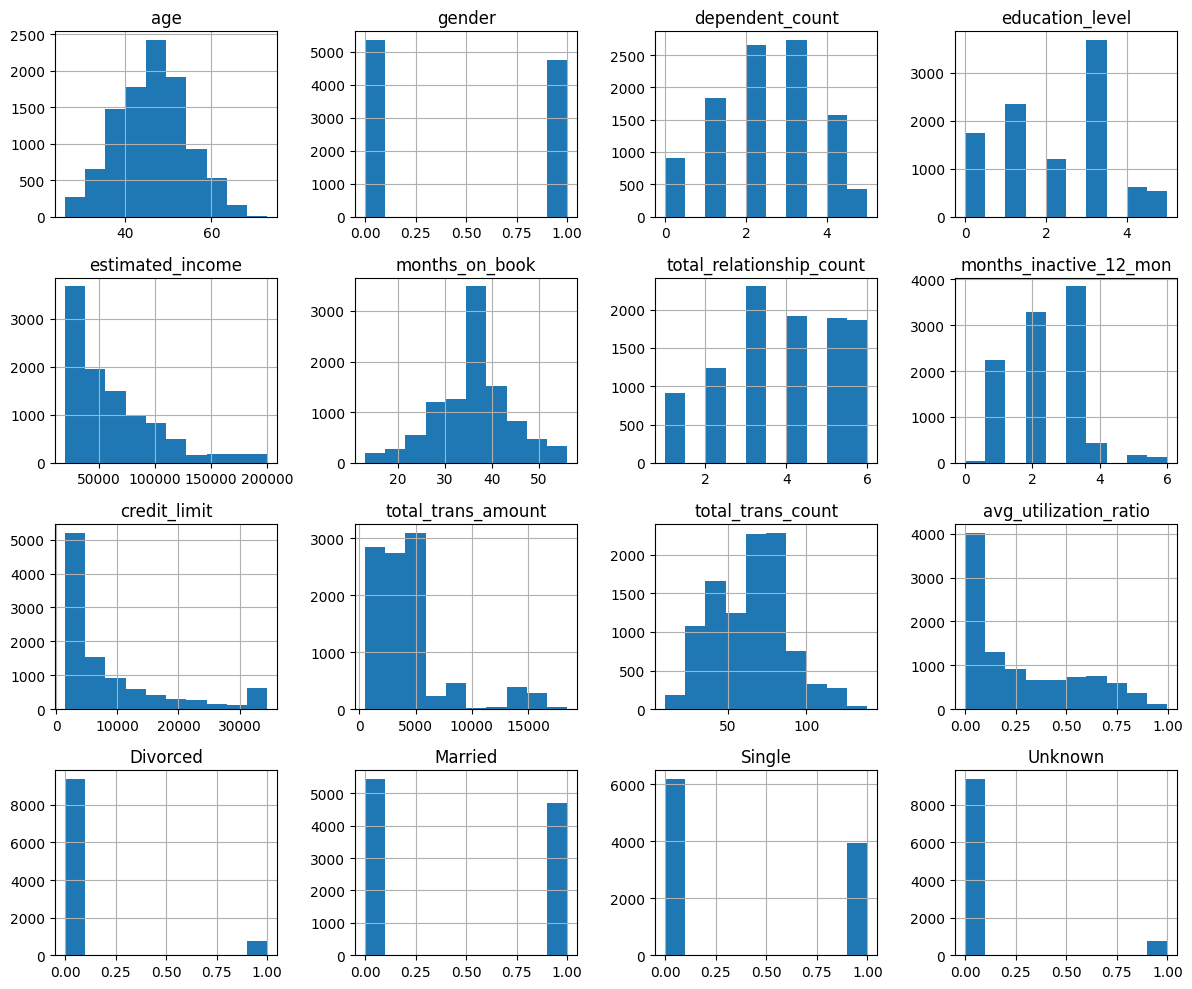

In [12]:
# Plot the distribution - hist() method
# with df đã transform full numeric: customers_df[col].value_counts()

figure, axes = plt.subplots(figsize=(12, 10)) # figure contains all subplots and a list of axes objects for each subplot
preprocessed_customers_df.hist(ax=axes) # ax của subplot được vẽ trên trục axes của figure được tạo trước đó
plt.tight_layout()
                                            
plt.show()

# 2 - Model: 
## Find an appropriate number of clusters;

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

[162031.99999999988, 144649.74481322526, 132795.03315068813, 122424.94118746939, 111788.49746351982, 103874.05888726303, 99034.202043208, 94563.79336412589, 91184.82261630225, 88895.69153997189, 86759.85302224624, 85029.73230365827, 83420.16410833197, 82035.10953753554, 80624.74426653767, 79287.07687975848, 77885.77351939745, 76651.52890988634, 76090.65507315187, 75425.54844196423, 74328.61661789018, 73293.40095505089, 72381.47836641449, 71858.9022039752, 71034.03791057822, 70227.30836986518, 70034.21320473234, 69200.85527002595, 68648.7386471892]


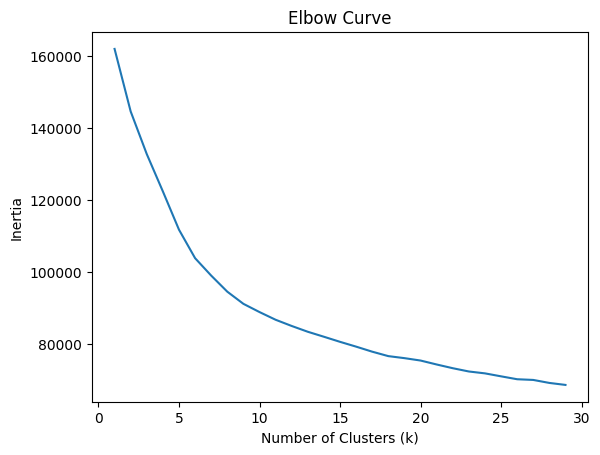

In [13]:
# 2 - Model: 
## Find an appropriate number of clusters;
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = [] # inertia=sum of squared distances bw each data point and its nearest centroid. 
# inertia: smaller -> the data points within a cluster: closer.

k_values = range(1, 30)
for k in k_values:
    kmeans_model = KMeans(n_clusters=k) # Kmeans object model
    clusters = kmeans_model.fit_predict(scaled_customers_df) # Fit data and create clusters
    inertia_list.append(kmeans_model.inertia_) # Append the inertia_ attribute of the model 
print(inertia_list)

# Plotting the elbow curve: the number of clusters (K) versus the corresponding inertia value.
# Elbow point: the intersection of the steep slope and the inclined bend.(giao dốc đứng và cong ngả)
# Adding clusters does not significantly reduce inertia value. 
plt.plot(k_values, inertia_list)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

[162031.99999999988, 144649.74481322526, 132795.27060263674, 121165.14629203931, 111788.49668591403, 103875.1362924387, 98669.53165809286, 94563.55148353265, 91184.59040123019]


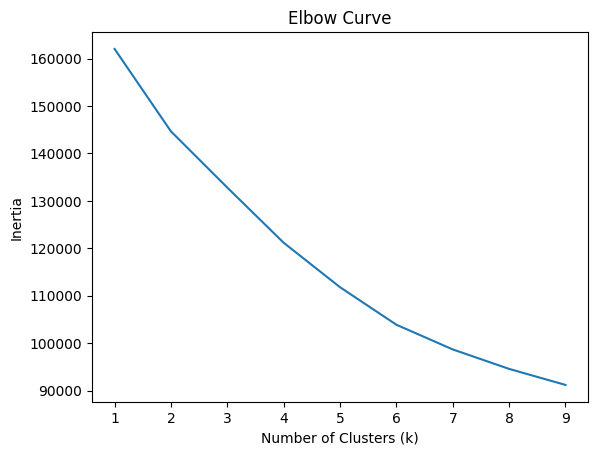

In [14]:
# 2 - Model: 
## Find an appropriate number of clusters;
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = [] # inertia=sum of squared distances bw each data point and its nearest centroid. 
# inertia: smaller -> the data points within a cluster: closer.

k_values = range(1, 10)
for k in k_values:
    kmeans_model = KMeans(n_clusters=k) # Kmeans object model
    clusters = kmeans_model.fit_predict(scaled_customers_df) # Fit data and create clusters
    inertia_list.append(kmeans_model.inertia_) # Append the inertia_ attribute of the model 
print(inertia_list)

# Plotting the elbow curve: the number of clusters (K) versus the corresponding inertia value.
# Elbow point: the intersection of the steep slope and the inclined bend.(giao dốc đứng và cong ngả)
# Adding clusters does not significantly reduce inertia value. 
plt.plot(k_values, inertia_list)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


## Elbow Curve

Đọc thêm về điểm khuỷu tay tại đây nhé: https://app.dataquest.io/c/135/m/743/number-of-clusters-and-the-elbow-rule/
và https://www.dataquest.io/path/data-scientist/

![Elbow curve](https://s3.amazonaws.com/dq-content/743/4.1-m743.svg)

Đối với trường hợp sử dụng cụ thể này, chúng tôi gọi nó là đường cong khuỷu tay vì chúng tôi giả định rằng các cụm đầu tiên sẽ làm cho quán tính giảm rất nhanh và tại một số điểm, sự giảm này sẽ trở nên chậm hơn theo cách mà chúng ta sẽ thấy một "khuỷu tay" sắc nét trên đường cong.




In [15]:
chosen_k = 6#  based on the elbow curve
kmeans_final = KMeans(n_clusters=chosen_k, random_state=42)

cluster_labels_final = kmeans_final.fit_predict(scaled_customers_df)
print(cluster_labels_final) # array containing cluster's labels

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[5 2 5 ... 1 3 1]


# 3 - Analyzing Results
How they can impact the business and marketing strategies for each type of customer.

In [16]:
customers_df = pd.read_csv('customer_segmentation.csv')
customers_df
# Familiarize ourselves with the dataset

## Feature Engineering: dealing with the 3 categorical variables

### drop `customer_id` col
customers_copy_df = customers_df.copy().drop('customer_id', axis=1)

### transform the `gender`, `education_level`` column to numeric
customers_copy_df['gender'] = customers_copy_df['gender'].replace({'M': 1, 'F': 0})

education_level_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}
customers_copy_df['education_level'] = customers_copy_df['education_level'].map(education_level_mapping)

### no level of magnitude between "Single", "Married" or "Divorced": one-hot-encoding to create dummy variables from `marital_status` column
marital_status_dummies = pd.get_dummies(customers_copy_df['marital_status'])
marital_status_dummies = marital_status_dummies.astype(int)
preprocessed_customers_df = pd.concat([customers_copy_df, marital_status_dummies], axis=1).drop('marital_status', axis=1)
preprocessed_customers_df

## Scaling the Data: transform the data so it's all on the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(preprocessed_customers_df) # instantiate 1 obj 
scaled_customers_array = scaler.transform(preprocessed_customers_df) #transform method to scale the data, assign to 1 diff variable. 
scaled_customers_df = pd.DataFrame(scaled_customers_array, columns=preprocessed_customers_df.columns)
scaled_customers_df


chosen_k = 6#  based on the elbow curve
kmeans_final = KMeans(n_clusters=chosen_k, random_state=42)

cluster_labels_final = kmeans_final.fit_predict(scaled_customers_df)
print(cluster_labels_final) # array containing cluster's labels

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[5 2 5 ... 1 3 1]


In [17]:
# create a CLUSTER column in our original dataset to better understand the characteristics of each one.
clustered_customers_df = customers_df.assign(CLUSTER = cluster_labels_final + 1) # assign, adjust start from 1 insted of 0
clustered_customers_df.head(20)


,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,6
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,6
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,4
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2
5,713061558,44,M,2,Graduate,Married,54000,36,3,1,4010.0,1088,24,0.311,2
6,810347208,51,M,4,High School,Married,166000,46,6,1,34516.0,1330,31,0.066,6
7,818906208,32,M,0,High School,Unknown,66000,27,2,2,29081.0,1538,36,0.048,4
8,710930508,37,M,3,Uneducated,Single,77000,36,5,2,22352.0,1350,24,0.113,6
9,719661558,48,M,2,Graduate,Single,87000,36,6,3,11656.0,1441,32,0.144,6


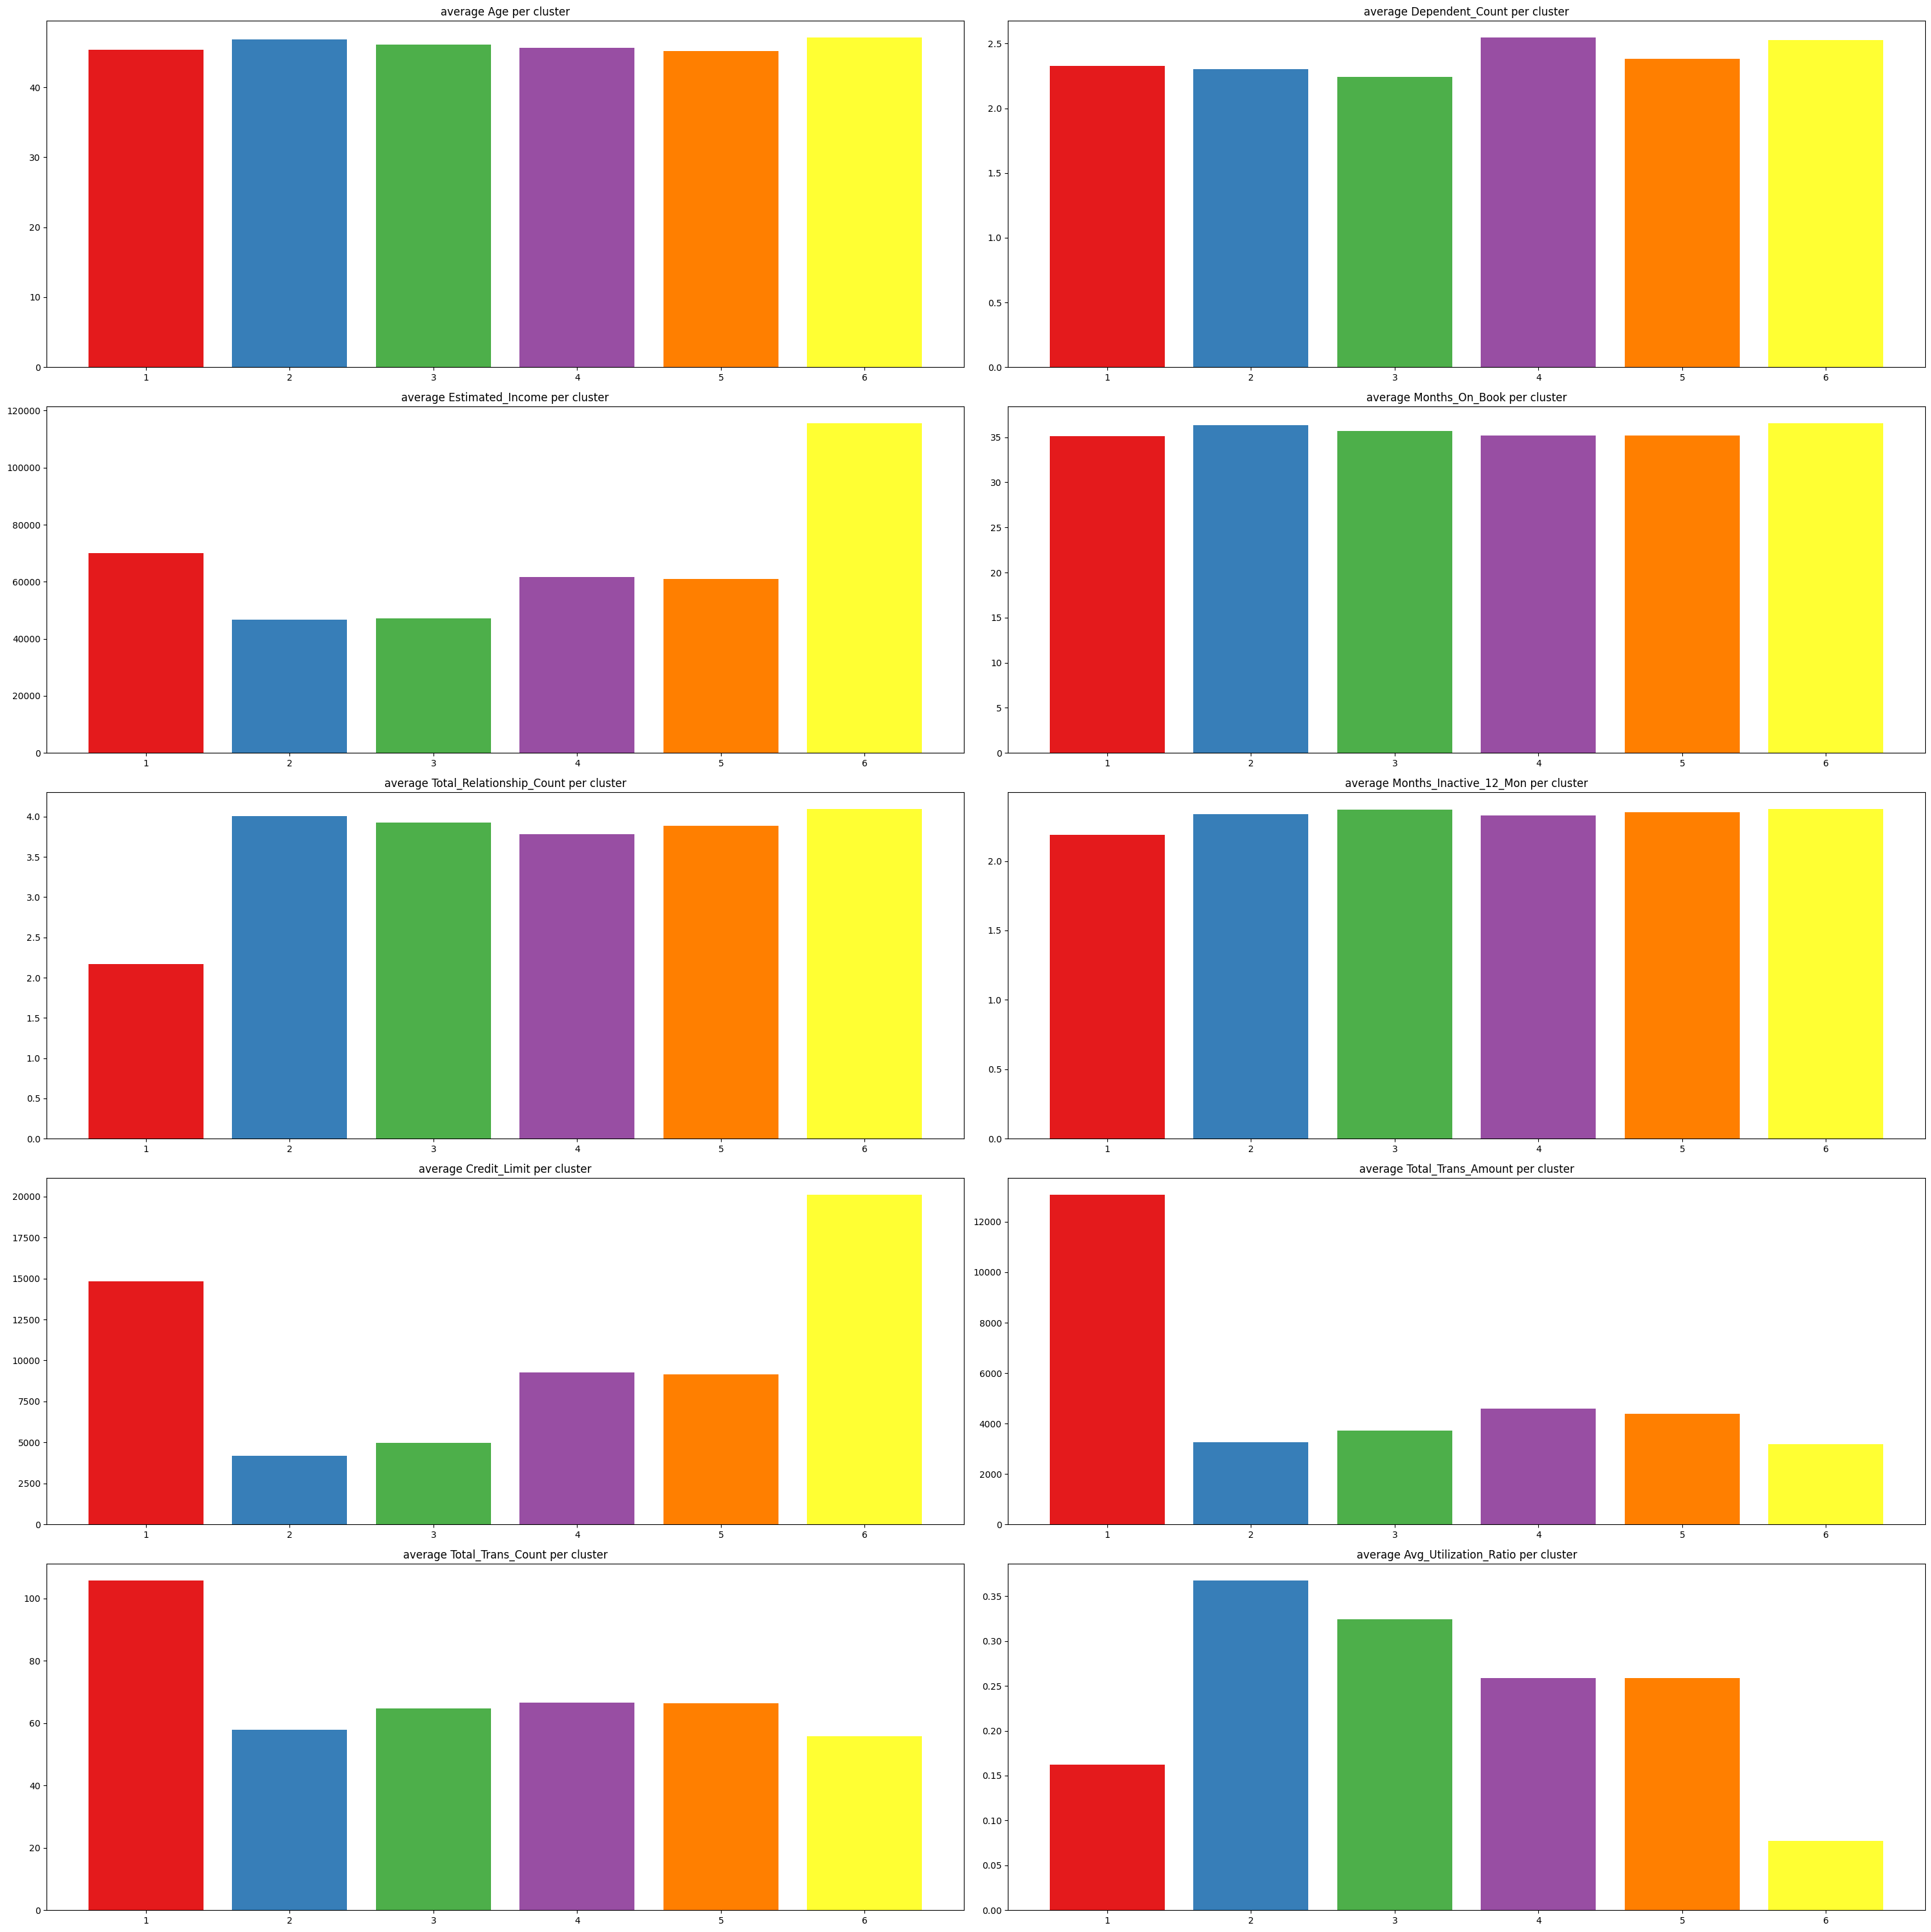

In [18]:
## Considering each numeric variable grouped by the CLUSTER column. 

# LỐI TƯ DUY 1: 
# numeric_columns = clustered_customers_df.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

# fig = plt.figure(figsize=(20, 20))
# for i, column in enumerate(numeric_columns):
#     plot_df = clustered_customers_df.groupby('CLUSTER')[column].mean()
#     ax = fig.add_subplot(5, 2, i+1)
#     ax.bar(plot_df.index, plot_df, color=sns.color_palette('Set1'))
#     ax.set_title(f'Average {column.title()} per Cluster')
#     ax.xaxis.grid(False)
    
# plt.tight_layout()
# plt.show()

# # LỐI TƯ DUY 2:
numeric_columns = clustered_customers_df.select_dtypes(include='number').drop(['customer_id', 'CLUSTER'], axis=1).columns

figure, axes = plt.subplots(5, 2, figsize=(30, 30)) # figure obj  grid of 5 rows and 2 cols of subplots, figure: hình ảnh 30inch*30inch.
axes = axes.flatten() # axes is a list of axes objects for each plot -> flatten: to 1-dimensional array.

for i, column in enumerate(numeric_columns): # enumerate funt to get both the index i and he column name 
    plot_df = clustered_customers_df.groupby('CLUSTER')[column].mean()
    axes[i].bar(plot_df.index, plot_df, color=sns.color_palette('Set1')) # Set1: a set of distinct colors
    axes[i].set_title(f'average {column.title()} per cluster')
    
plt.tight_layout()
plt.show()


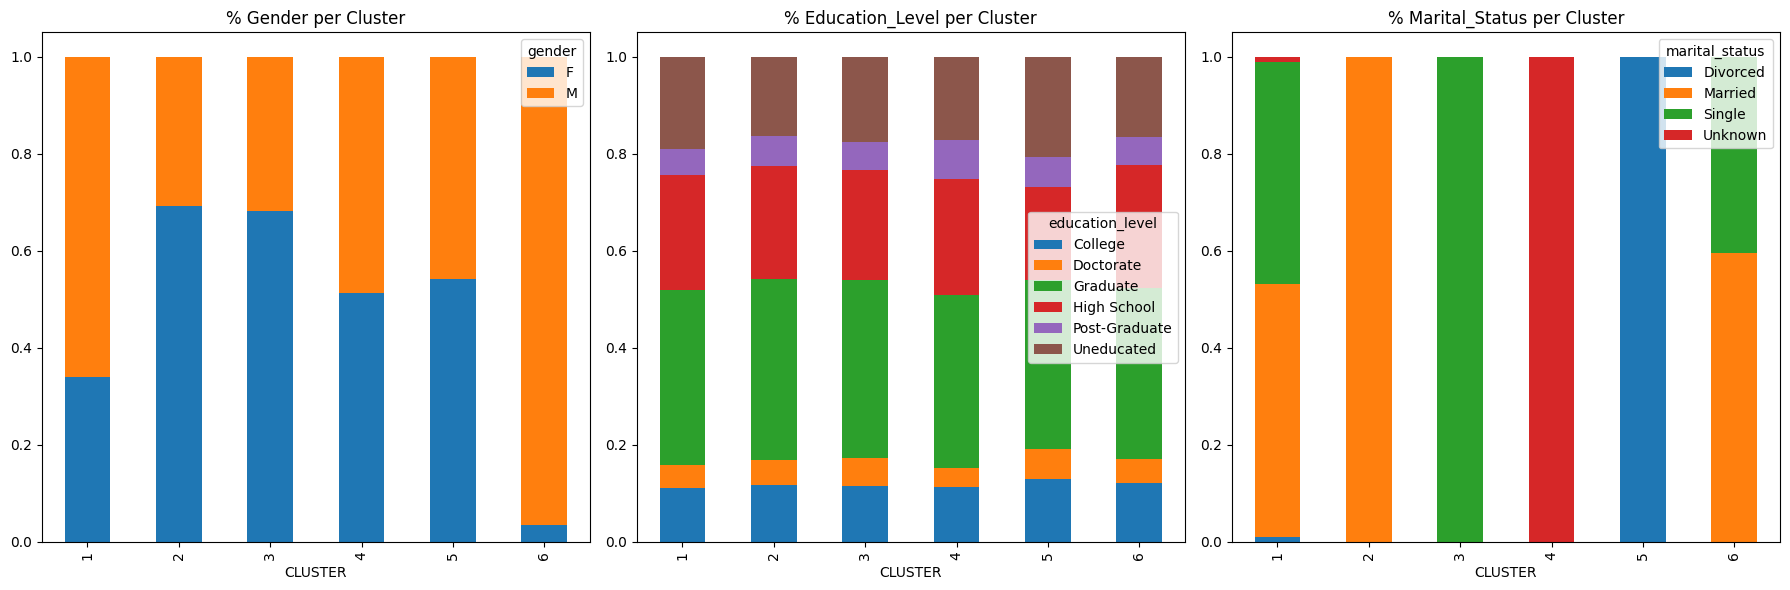

In [19]:
## (WITH crosstab funct) Considering each categorical columns grouped by the CLUSTER column 
categor_columns = clustered_customers_df.select_dtypes(include=['object'])
fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(categor_columns):
    # # pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
    plot_df = pd.crosstab(index=clustered_customers_df['CLUSTER'],
                          columns=clustered_customers_df[col],
                          normalize='index')

    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax) # stacked: xếp chồng, # ax của subplot được vẽ trên trục axes của figure được tạo trước đó
    ax.set_title(f'% {col.title()} per Cluster')

plt.tight_layout()
plt.show()


In [20]:
clustered_customers_copy_df = clustered_customers_df.copy()
clustered_customers_copy_df['gender'] = clustered_customers_copy_df['gender'].replace({'M': 1, 'F': 0})

### USE HUE PARMETER, and (6 pairs) high correlation variable_pairs

fig, axes = plt.subplots(3, 2, figsize=(16, 8))
variable_pairs = [
    ('age', 'months_on_book'), ('estimated_income', 'credit_limit'),
    ('total_trans_count', 'total_trans_amount'), ('credit_limit', 'avg_utilization_ratio'),
    ('gender', 'estimated_income'), ('gender', 'credit_limit'),
                 ]

for i, ax in enumerate(axes.flat):
    x_var, y_var = variable_pairs[i]
    sns.scatterplot(x=x_var, y=y_var, hue='CLUSTER', data=clustered_customers_copy_df, palette='Set1', ax=ax)
    
plt.tight_layout()
plt.show()


## CONCLUSION: 

Annotation on columns in df:
- customer_id, age, gender
- dependent_count: number of dependents of each customer.
- education_level
- marital_status: marital status ("Single", "Married", etc.) tình trạng hôn nhân 
- estimated_income: the estimated income for the customer projected by the data science team.
- months_on_book: time as a customer in months.
- total_relationship_count: number of times the customer contacted the company.
- months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
- credit_limit: customer's credit limit.  : Hạn mức tín dụng
- total_trans_amount: (total amount transitioned) the overall amount of money spent on the card by the customer. tổng số tiền khách hàng đã chi qua thẻ
- total_trans_count: (total number of transactions) the overall number of times the customer used the card. tổng số lần khách hàng đã sử dụng thẻ
- avg_utilization_ratio: daily average utilization ratio (Tỷ lệ sử dụng trung bình hàng ngày)

###Cluster 1

**Characteristics**: Mostly men; low total_relationship_count, high credit_limit, high total_trans_amount; high total_trans_count; low avg_utilization_ratio. 

**Insight**: Men with low number of company contacts. High volume spent on the card, but do not use it on a daily basis. Could be encouraged to spend more.

###Cluster 2

**Characteristics**: Mostly women;  100% married people; low estimated_income; low credit_limit; low total_trans_amount; high avg_utilization_ratio.

**Insight**: Married people (majority women) with low income and limit but utilize too much of their credit with a few larger purchases

###Cluster 3

**Characteristics**: Mostly women; 100% single people, low estimated_income, low credit_limit, low amount_transitioned, high avg_utilization_ratio.

**Insight**: Single (mostly women) people that use their card a lot but have low credit limits and income. Could be given a bit more credit limit.

###Cluster 4

**Characteristics**: Gender well divided; marital_status: 100% unknown, low credit_limit, high avg_utilization_ratio; smaller cluster.

**Insight**: Men and women with low credit limits but high utilization rate.


###Cluster 5

**Characteristics**: Gender well divided, 100% divorced, low credit_limit, low total_trans_amount, high avg_utilization_ratio.

**Insight**: a high level of credit, but their total transaction amount is low. This may require them to need additional assistance to increase their credit line or improve their personal financial situation.

###Cluster 6

**Characteristics**: Mostly men, mostly single and married, high estimated_income, high credit_limit; low total_trans_amount; low total_trans_count, low utilization rate.

**Insight**: People (majority men) with high income and credit limits, but don't use the card. Could be encourage to use it.


In [ ]:
# List of customers and clusters
clustered_customers_df[['customer_id', 'CLUSTER']]

### Lịch sử: 
- 00h -2h30 T3/18/7/2023: PICK mini-proj (Clustering&GCN)
- 21h30 T3/18/7/2023 to 2h00 T4/19/7/2023: bàn học tại nhà mới with 6 friends: 4hr
- 10H30 T4/19/7/2023 to 17h30 T4/19/7/2023: Thư viện HUST: 7h

Sum: Completing a mini project in 12 hours is quite good. finished CLUSTERING, not GCN.

### Đánh giá độ hiệu quả của model và thử 1 vài model khác?
Để sử dụng mô hình GCN (Graph Convolutional Network) hoặc GAT (Graph Attention Network) cho bài toán phân cụm khách hàng, đầu tiên chúng ta cần xây dựng một đồ thị từ dữ liệu. Trong trường hợp này, các khách hàng có thể được xem như là các đỉnh của đồ thị và các cạnh có thể được định nghĩa dựa trên một số tiêu chí như độ tương tự giữa các khách hàng.

Tuy nhiên, không phải mọi bài toán có thể được giải quyết tốt bằng GCN hoặc GAT. GCN và GAT thường được sử dụng trong các bài toán mà dữ liệu tự nhiên được biểu diễn dưới dạng đồ thị, như bài toán phân loại nút trong mạng lưới xã hội, bài toán dự đoán liên kết trong mạng lưới protein, v.v. Trong bài toán phân cụm khách hàng, việc biểu diễn dữ liệu dưới dạng đồ thị có thể không mang lại nhiều lợi ích so với các phương pháp phân cụm truyền thống như K-Means.

Bên cạnh đó, dữ liệu của chúng ta phải đủ lớn để việc sử dụng GCN hoặc GAT có ý nghĩa. Đối với dữ liệu nhỏ, các phương pháp phân cụm truyền thống thường hoạt động tốt hơn.
